In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

import ML_PROJECT_BROQUA_DONNAIS_POIRIS_MCE_2023 as f

## 1. Extraction des données et preprocessing

In [2]:
df_kidney = f.preprocessing('kidney_disease.csv')
df_banknote = f.preprocessing('data_banknote_authentication.csv')

### Visualisation des datasets

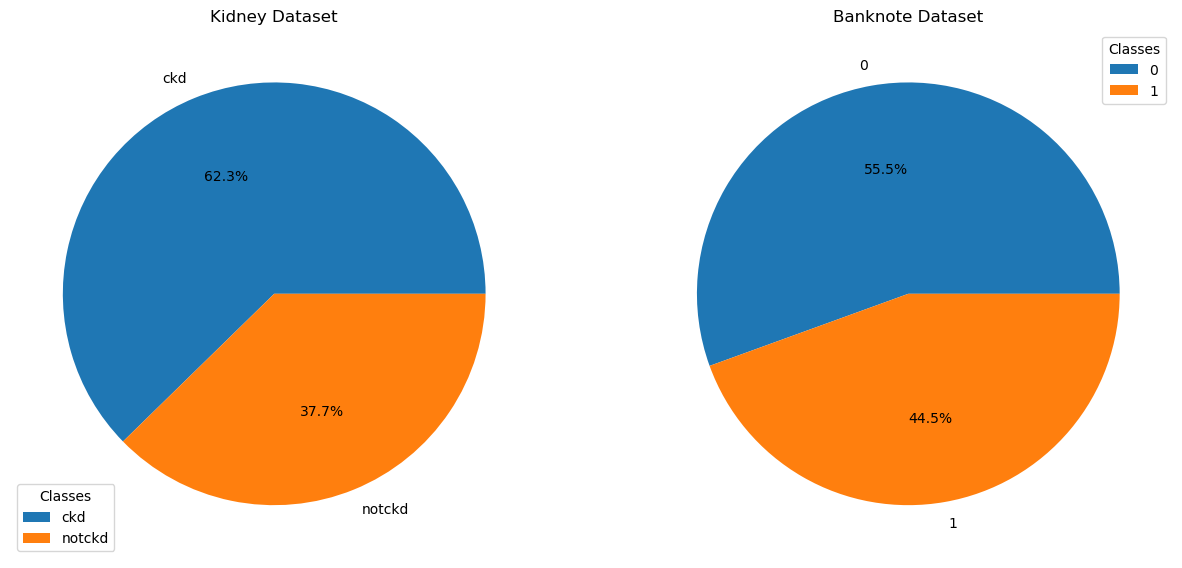

In [3]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
count_kidney = df_kidney['Classe'].value_counts()
plt.pie(count_kidney, labels = ['ckd', 'notckd'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title('Kidney Dataset')
plt.legend(title = 'Classes')
plt.subplot(1,2,2)
count_banknote = df_banknote['Classe'].value_counts()
plt.pie(count_banknote, labels = ['0','1'], autopct = lambda x: str(round(x, 1)) + '%')
plt.title('Banknote Dataset')
plt.legend(title = 'Classes')
plt.show()

## 2. Entrainement des modèles

In [4]:
models=[f.DecisionTree_gridsearch,f.RandomForest_gridsearch, f.MLP_gridsearch]

In [5]:
def benchmark(df,models):
    bm = pd.DataFrame(columns=["model","parameters","X_test","y_test","y_pred"])
    k=1
    
    x_train,x_test,y_train,y_test = f.diviser_jeu_de_donnees(df,1/3)
    
    #Pour chaque model on stock les meilleurs hyperparamètres ainsi que les données de test et d'entrainement associées
    #qui serviront pour l'évaluation
    for m in models: 
        y_pred,tuned_param = m(x_train,x_test,y_train,y_test)
        bm.loc[k] = [m.__name__,tuned_param,x_test,y_test,y_pred]
        k+=1
    return bm

In [6]:
bm_kidney = benchmark(df_kidney, models)
bm_banknote = benchmark(df_banknote, models)

In [7]:
bm_kidney

model                                         parameters  \
1  DecisionTree_gridsearch              {'criterion': 'gini', 'max_depth': 2}   
2  RandomForest_gridsearch  {'bootstrap': True, 'max_depth': 2, 'max_featu...   
3           MLP_gridsearch  {'alpha': 0.01, 'hidden_layer_sizes': 10, 'max...   

                                              X_test  \
1             id       age        bp        sg   ...   
2             id       age        bp        sg   ...   
3             id       age        bp        sg   ...   

                                              y_test  \
1  180    0
305    1
322    1
155    0
77     0
 ...   
2  180    0
305    1
322    1
155    0
77     0
 ...   
3  180    0
305    1
322    1
155    0
77     0
 ...   

                                              y_pred  
1  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...  
2  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...  
3  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...

## 3.Evalution des modeles

In [8]:
eval_kidney = pd.DataFrame()
for i in range(1,len(bm_kidney)+1):
    eval_kidney.loc[i,'f1_score'] = f1_score(bm_kidney.loc[i,"y_test"],bm_kidney.loc[i,"y_pred"],average='weighted')
    eval_kidney.loc[i,'accuracy_score'] = accuracy_score(bm_kidney.loc[i,"y_test"],bm_kidney.loc[i,"y_pred"])
    eval_kidney.loc[i,'precision_score'] = precision_score(bm_kidney.loc[i,"y_test"],bm_kidney.loc[i,"y_pred"])

eval_kidney

f1_score  accuracy_score  precision_score
1  1.000000        1.000000         1.000000
2  1.000000        1.000000         1.000000
3  0.992498        0.992481         0.979592

In [9]:
eval_banknote = pd.DataFrame()
for i in range(1,len(bm_banknote)+1):
    eval_banknote.loc[i,'f1_score'] = f1_score(bm_banknote.loc[i,"y_test"],bm_banknote.loc[i,"y_pred"],average='weighted')
    eval_banknote.loc[i,'accuracy_score'] = accuracy_score(bm_banknote.loc[i,"y_test"],bm_banknote.loc[i,"y_pred"])
    eval_banknote.loc[i,'precision_score'] = precision_score(bm_banknote.loc[i,"y_test"],bm_banknote.loc[i,"y_pred"])

eval_banknote

f1_score  accuracy_score  precision_score
1  0.978190        0.978166         0.965517
2  0.997817        0.997817         0.995000
3  1.000000        1.000000         1.000000

## 4.Visualisation du benchmark

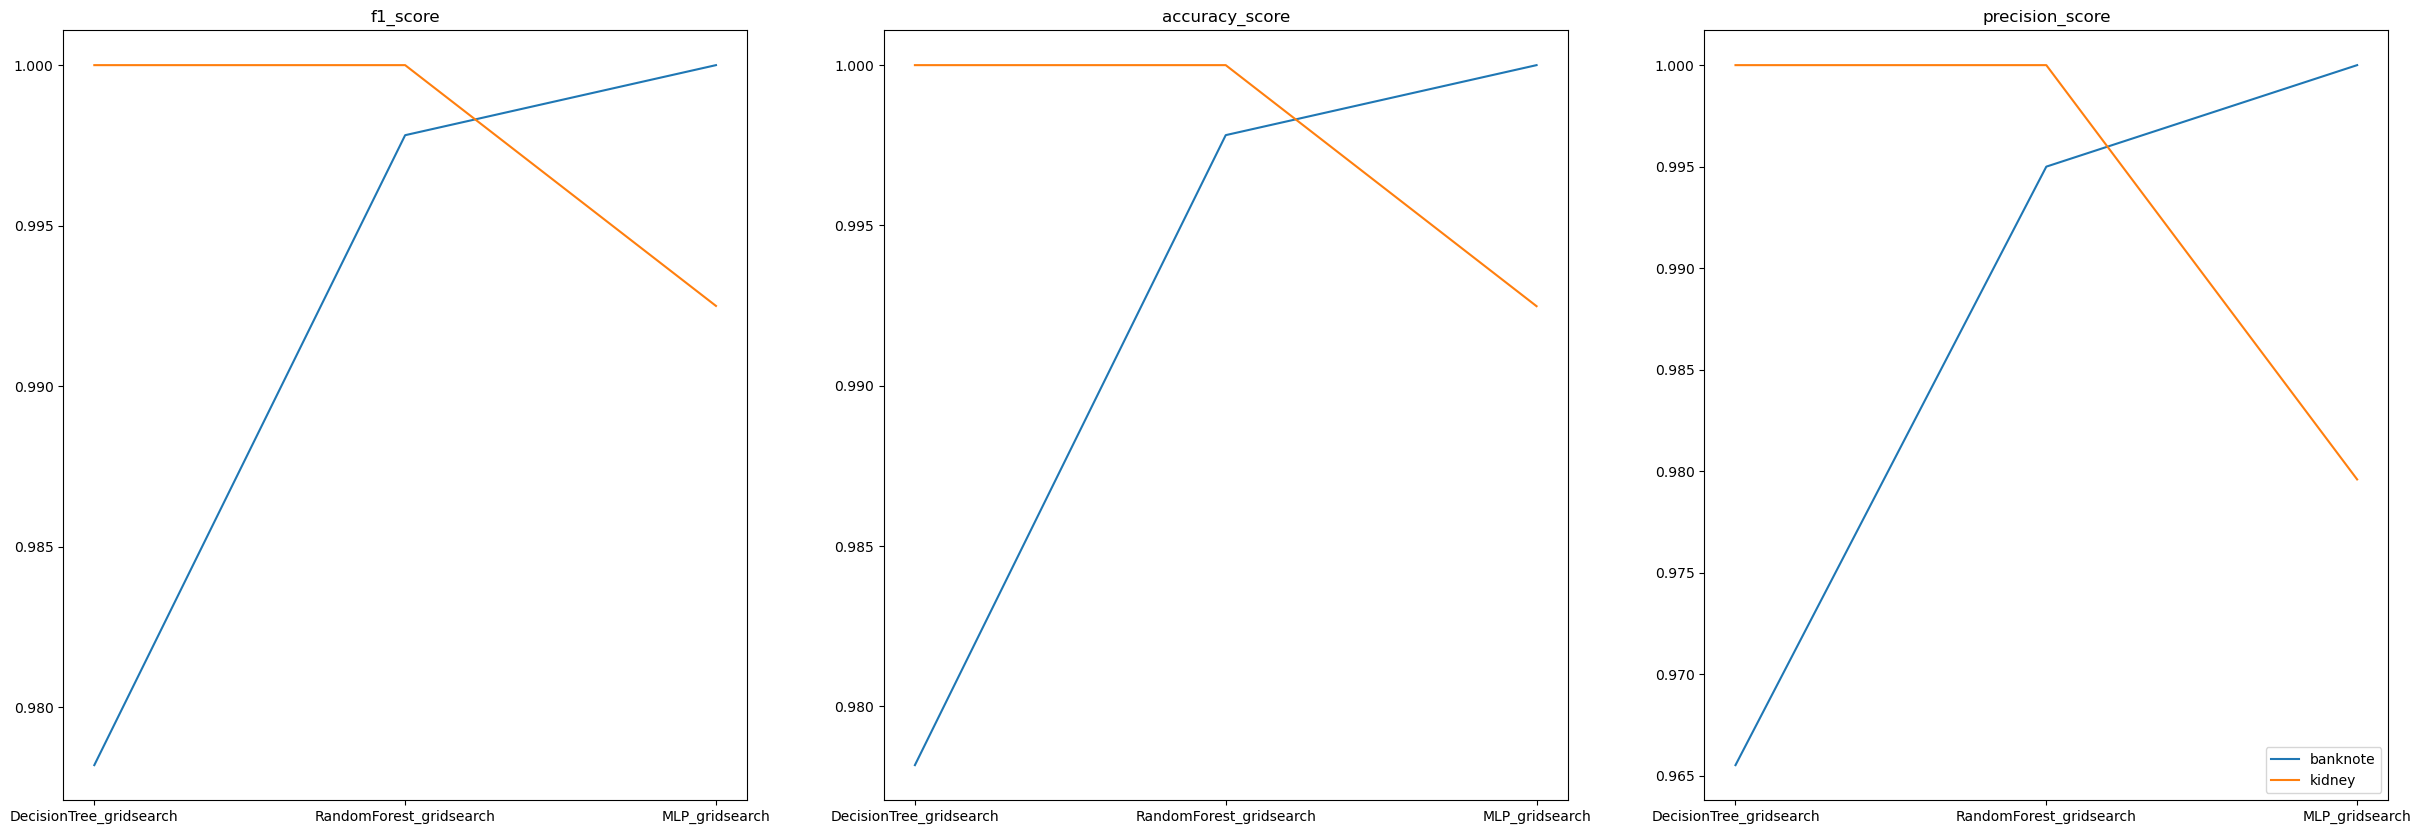

In [10]:
fig, axs = plt.subplots(1,3, figsize=(30,10))

axs[0].plot(np.array(bm_banknote['model']),np.array(eval_banknote['f1_score']),label='f1_score')
axs[0].plot(np.array(bm_kidney['model']),np.array(eval_kidney['f1_score']),label='f1_score')
axs[0].set_title('f1_score')

axs[1].plot(np.array(bm_banknote['model']),np.array(eval_banknote['accuracy_score']),label='accuracy_score_bank')
axs[1].plot(np.array(bm_kidney['model']),np.array(eval_kidney['accuracy_score']),label='accuracy_score_bank')
axs[1].set_title('accuracy_score')

axs[2].plot(np.array(bm_banknote['model']),np.array(eval_banknote['precision_score']),label='banknote')
axs[2].plot(np.array(bm_kidney['model']),np.array(eval_kidney['precision_score']),label='kidney')
axs[2].set_title('precision_score')

plt.legend()
plt.show()